In [46]:
#import libraries
import pandas as pd
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer

In [47]:
#read and view database
comcast = pd.read_csv('Comcast_telecom_complaints_data.csv')
comcast.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [48]:
comcast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [49]:
#check for nulls
comcast.isna().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [50]:
comcast['Customer Complaint'].str=="na"

False

In [51]:
#select complaints column and copy to new a dataframe
complaints = comcast[['Customer Complaint']].copy()

In [52]:
#get stopwords
stop = set(stopwords.words('english'))
print(stop)

{'are', 'were', 'in', 'after', "it's", 'no', "that'll", 'yours', 'she', 'and', 'himself', 'her', 'have', 'those', 'where', "doesn't", "shan't", 'themselves', 'there', "wouldn't", 'down', 're', 'yourself', 'they', "hadn't", 'them', 'above', 'until', 'other', 'is', 'he', 'mightn', 'we', 'by', 'wouldn', 'but', 'out', 'at', 'don', 'if', 'itself', 'against', 'didn', 'am', 's', 'needn', 'herself', "you've", 'such', 'shan', 'who', 'then', 'it', 'do', "you're", "didn't", 'should', 'will', "couldn't", 'doing', 'about', "mustn't", 'weren', 'been', "haven't", 'that', 'mustn', 'only', 'than', 'more', 'any', 'him', 'with', 'having', 'for', 'all', "wasn't", 'o', 'this', 'below', 'both', 'here', 'too', 'under', 'was', 'hadn', 'same', 'what', 'ain', 'me', 'his', 'our', 'just', 'now', "won't", 'which', 'does', 'not', 'of', 'an', 'again', 'when', 'how', "she's", 'from', 'can', 'll', 'between', 'theirs', 'ma', 'd', 'or', 'these', 'being', 'over', "aren't", 'doesn', 'on', 'through', 'most', 'i', 'while', 

In [53]:
#initialize Lemmatizer
lem  = WordNetLemmatizer()

In [54]:
#define a method for getting tags to be used by pos_tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

In [55]:
#define a method to lemmatize tokens using the tags obtained from above method
def lemmatize_token(word):
    lst = []
    lst.append(word)
    wordtpl = pos_tag(lst)
    tag = nltk_tag_to_wordnet_tag(wordtpl[0][1])
    if(tag!=None):
        return lem.lemmatize(word,tag)
    else:
        return word
    

In [56]:
#create a new column for cleaned and normalized text
from nltk import word_tokenize
complaints['new_complaint'] = comcast['Customer Complaint'].apply(lambda x: ' '.join([lemmatize_token(word.lower()) for word in word_tokenize(x) if word.lower() not in stop]))
complaints.head()

,Customer Complaint,new_complaint
0,Comcast Cable Internet Speeds,comcast cable internet speed
1,Payment disappear - service got disconnected,payment disappear - service get disconnect
2,Speed and Service,speed service
3,Comcast Imposed a New Usage Cap of 300GB that ...,comcast impose new usage cap 300gb punishes st...
4,Comcast not working and no service to boot,comcast work service boot


In [57]:
#import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [58]:
#initialize Countzvectorizer with mini document frequency as 0.01 so as to avoid tokens which appear only once
cv = CountVectorizer(min_df=0.001)

In [59]:
#fit the complaints into the vectorizer to create bag of words
bag_of_words = cv.fit_transform(complaints['new_complaint'])

In [60]:
#print created vocabulary
print(cv.vocabulary_)

{'comcast': 63, 'cable': 49, 'internet': 166, 'speed': 301, 'payment': 232, 'service': 289, 'get': 140, 'disconnect': 100, 'new': 209, 'usage': 337, 'cap': 53, '300gb': 5, 'stream': 304, 'work': 354, 'isp': 169, 'charge': 56, 'data': 86, 'limit': 177, 'overage': 223, 'fee': 130, 'throttle': 319, 'refuse': 265, 'help': 146, 'correct': 81, 'outage': 221, 'raise': 258, 'price': 245, 'available': 33, 'ask': 27, 'billing': 42, 'failure': 125, 'email': 110, 'open': 218, 'rule': 281, 'block': 43, 'hbo': 144, 'go': 142, 'access': 8, 'sony': 300, 'every': 117, 'complaint': 67, 'availability': 31, 'claim': 59, 'need': 206, 'return': 278, 'equipment': 112, 'never': 208, 'horrible': 151, 'provide': 251, 'bill': 41, 'time': 320, 'monopoly': 200, 'customer': 85, 'bundling': 46, 'practice': 243, 'bait': 37, 'switch': 307, 'contract': 79, 'unable': 327, 'agent': 16, 'issue': 170, 'wifi': 349, 'xfinity': 356, 'refund': 263, 'credit': 84, 'signal': 295, 'slow': 298, 'pay': 231, 'bandwidth': 38, 'even': 

In [61]:
print(bag_of_words.shape)
print(bag_of_words.count_nonzero())

(2224, 358)
7027


In [62]:
#import tfidf transformer
from sklearn.feature_extraction.text import TfidfTransformer

In [63]:
#initialize TfIdfTransformer
tt= TfidfTransformer()

In [64]:
#fit the bag of words into transformer, apply tfidf weighting 
tt1 = tt.fit(bag_of_words)
tfidf = tt1.transform(bag_of_words)

In [65]:
# get the sparse matrix
coo_matrix = tfidf.tocoo()

In [66]:
print(coo_matrix)

  (0, 301)	0.5325001076260684
  (0, 166)	0.3746305059161461
  (0, 63)	0.2435956282238731
  (0, 49)	0.7188579757681309
  (1, 289)	0.23714191159773496
  (1, 232)	0.5782118520907393
  (1, 140)	0.5245053116674472
  (1, 100)	0.5782118520907393
  (2, 301)	0.808029446075782
  (2, 289)	0.5891421002393777
  (3, 337)	0.38337927402698907
  (3, 304)	0.5458425466114247
  (3, 209)	0.47896750925570925
  (3, 63)	0.12475437405887865
  (3, 53)	0.2739626314031733
  (3, 5)	0.4848166605847019
  (4, 354)	0.8940298450160572
  (4, 289)	0.3794965467415188
  (4, 63)	0.23810293411007555
  (5, 223)	0.448552630591276
  (5, 177)	0.45616446397469657
  (5, 169)	0.5293429260877441
  (5, 130)	0.38964517421646583
  (5, 86)	0.26502327414126914
  (5, 56)	0.297405259486867
  :	:
  (2216, 148)	0.6141876715207999
  (2216, 49)	0.5398952939099594
  (2216, 41)	0.5021160129259206
  (2217, 289)	0.4059553871873824
  (2217, 247)	0.825687906546805
  (2217, 166)	0.39171380444898424
  (2218, 319)	0.43675098635892146
  (2218, 301)	0.68

In [67]:
coo_matrix.shape

(2224, 358)

In [68]:
cv.get_feature_names()[:10]

['10', '12', '2015', '25', '300', '300gb', '50', '60', 'access', 'account']

In [69]:
#define a method to sort coo matrix by their tfidf scores in descending order by first creating a 3-tuple of
#document,token and tfidf scores
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.row, coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[2], x[1],x[0]), reverse=True)

In [70]:
sorted_items = sort_coo(coo_matrix)
sorted_items[:10]

[(1171, 356, 1.0),
 (379, 356, 1.0),
 (32, 356, 1.0),
 (1325, 347, 1.0),
 (423, 335, 1.0),
 (2171, 319, 1.0),
 (939, 319, 1.0),
 (888, 319, 1.0),
 (233, 319, 1.0),
 (156, 319, 1.0)]

In [71]:
len(sort_coo(coo_matrix))


7027

In [72]:
len(coo_matrix.col)

7027

In [73]:
#create a dictionary of feature names mapped to their tfidf scores, when tifdf = 1 
#to get the most important words in the corpus
features = cv.get_feature_names()
keyword_dict=   dict((features[item[1]], item[2]) for item in sorted_items if item[2]==1)
print(keyword_dict)
    

{'xfinity': 1.0, 'website': 1.0, 'upgrade': 1.0, 'throttle': 1.0, 'speed': 1.0, 'slow': 1.0, 'service': 1.0, 'scam': 1.0, 'sale': 1.0, 'refusal': 1.0, 'rate': 1.0, 'pricing': 1.0, 'policy': 1.0, 'payment': 1.0, 'pay': 1.0, 'package': 1.0, 'overcharge': 1.0, 'overbilling': 1.0, 'monopoly': 1.0, 'mail': 1.0, 'invalid': 1.0, 'internet': 1.0, 'installation': 1.0, 'fraud': 1.0, 'fee': 1.0, 'essential': 1.0, 'email': 1.0, 'discount': 1.0, 'disconnection': 1.0, 'data': 1.0, 'contract': 1.0, 'complaint': 1.0, 'comcast': 1.0, 'claim': 1.0, 'charge': 1.0, 'cable': 1.0, 'bundle': 1.0, 'broadband': 1.0, 'billing': 1.0, 'bill': 1.0, 'availabilty': 1.0, 'account': 1.0}


In [74]:
#take the keywords and define 4 categories containing those keywords
#define a method to categorize corpus into the 4 categories

billing = ['pricing', 'rate', 'pmts', 'pay', 'fees', 'charge', 'bill','price']
internet = ['internet', 'data', 'speed', 'throttling', 'cap', 'throttle', 'slow','broadband']
services = [ 'service','complaint', 'email', 'mail']
def complaint_categories(complaint):
    if (any(s in complaint.lower() for s in billing)):
        return 'billing'
    elif(any(s in complaint.lower() for s in internet)):
        return 'internet'
    elif(any(s in complaint.lower() for s in services)):
        return 'services'
    else:
        return 'others'

In [75]:
#apply the method to create a new column with categories of complaints
comcast['complaints_categories'] = comcast['Customer Complaint'].apply(complaint_categories)
comcast.tail(10)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,complaints_categories
2214,310847,Comcast Internet Service quality,28-05-15,28-May-15,8:56:14 AM,Internet,York,Pennsylvania,17403,Solved,No,internet
2215,360946,Comcast unfair pricing,24-06-15,24-Jun-15,8:32:24 AM,Customer Care Call,York,Pennsylvania,17403,Solved,No,billing
2216,363852,High Internet & Cable Bill,25-06-15,25-Jun-15,7:17:21 AM,Customer Care Call,York,Pennsylvania,17404,Solved,Yes,billing
2217,254488,problems with internet service,24-04-15,24-Apr-15,5:05:25 AM,Internet,York Haven,Pennsylvania,17370,Closed,No,internet
2218,338192,"Speed throttling, speeds not at promised output",06-12-15,06-Dec-15,6:35:59 PM,Customer Care Call,Yorkville,Illinois,60560,Open,Yes,internet
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,services
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,billing
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,services
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,others
2223,363614,"Comcast, Ypsilanti MI Internet Speed",24-06-15,24-Jun-15,10:28:33 PM,Customer Care Call,Ypsilanti,Michigan,48198,Open,Yes,internet


In [76]:
#print the table for complaints of different types
categories = pd.DataFrame(comcast['complaints_categories'].value_counts())
print(categories)

          complaints_categories
internet                    726
billing                     675
others                      538
services                    285


In [77]:
#import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
#convert the column with dates to date-time data
comcast['Date_month_year'] = comcast['Date_month_year'].apply(pd.to_datetime)
comcast.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,complaints_categories
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,internet
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,billing
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,internet
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,internet
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,services


In [79]:
#define a method to get month from date-time data
def getMonth(date_time):
    return date_time.strftime("%b")

In [80]:
#create a new column containing months extracted from date-time data
comcast['Month of Complaint'] = comcast['Date_month_year'].apply(getMonth)
comcast.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,complaints_categories,Month of Complaint
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,internet,Apr
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,billing,Aug
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,internet,Apr
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,internet,Jul
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,services,May


In [81]:
#define a method to get day of the week from the date-time dat
def getDay(date_time):
    return date_time.strftime("%A")

In [82]:
#create a new column which would have day of weeks corresponsing to each date--time value
comcast['Day of Complaint'] = comcast['Date_month_year'].apply(getDay)
comcast.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,complaints_categories,Month of Complaint,Day of Complaint
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,internet,Apr,Wednesday
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,billing,Aug,Tuesday
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,internet,Apr,Saturday
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,internet,Jul,Sunday
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,services,May,Tuesday


In [83]:
#get complaints monthwise
complaints_by_month = comcast['Month of Complaint'].value_counts()
complaints_by_month

Jun    1046
Apr     375
May     317
Aug      67
Dec      65
Feb      59
Sep      55
Jan      55
Oct      53
Jul      49
Mar      45
Nov      38
Name: Month of Complaint, dtype: int64

In [84]:
comcast.dtypes

Ticket #                               object
Customer Complaint                     object
Date                                   object
Date_month_year                datetime64[ns]
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
complaints_categories                  object
Month of Complaint                     object
Day of Complaint                       object
dtype: object

In [85]:
#sort the dataframe by data time and create a new dataframe
comcast_sorted = pd.DataFrame(comcast.sort_values(by=["Date_month_year"]))
comcast_sorted.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,complaints_categories,Month of Complaint,Day of Complaint
1160,211472,comcast cable,04-01-15,2015-01-04,10:43:20 AM,Customer Care Call,Lockport,Illinois,60441,Closed,No,others,Jan,Sunday
767,213355,Comcast is ignoring me now. They are making NO...,04-01-15,2015-01-04,10:56:15 PM,Internet,Golden,Colorado,80401,Closed,No,others,Jan,Sunday
2143,213198,Fradulent Services,04-01-15,2015-01-04,8:56:38 PM,Customer Care Call,Waukegan,Illinois,60085,Closed,No,services,Jan,Sunday
268,212818,Incorrect Billing,04-01-15,2015-01-04,5:39:39 PM,Customer Care Call,Boynton Beach,Florida,33426,Closed,No,billing,Jan,Sunday
908,211904,Unable to get in touch with anyone that has th...,04-01-15,2015-01-04,1:06:33 PM,Customer Care Call,Huntsville,Alabama,35801,Closed,No,services,Jan,Sunday


In [86]:
#reset the index of the new dataframe
comcast_sorted.reset_index(drop=True)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,complaints_categories,Month of Complaint,Day of Complaint
0,211472,comcast cable,04-01-15,2015-01-04,10:43:20 AM,Customer Care Call,Lockport,Illinois,60441,Closed,No,others,Jan,Sunday
1,213355,Comcast is ignoring me now. They are making NO...,04-01-15,2015-01-04,10:56:15 PM,Internet,Golden,Colorado,80401,Closed,No,others,Jan,Sunday
2,213198,Fradulent Services,04-01-15,2015-01-04,8:56:38 PM,Customer Care Call,Waukegan,Illinois,60085,Closed,No,services,Jan,Sunday
3,212818,Incorrect Billing,04-01-15,2015-01-04,5:39:39 PM,Customer Care Call,Boynton Beach,Florida,33426,Closed,No,billing,Jan,Sunday
4,211904,Unable to get in touch with anyone that has th...,04-01-15,2015-01-04,1:06:33 PM,Customer Care Call,Huntsville,Alabama,35801,Closed,No,services,Jan,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,337489,Comcast not refunding my credit,06-12-15,2015-12-06,3:59:57 PM,Internet,Alpharetta,Georgia,30005,Solved,No,others,Dec,Sunday
2220,336690,Comcast Data Caps,06-12-15,2015-12-06,11:52:00 AM,Customer Care Call,Knoxville,Tennessee,37919,Solved,No,internet,Dec,Sunday
2221,336234,Unresolved Issues,06-12-15,2015-12-06,7:59:56 AM,Customer Care Call,Colorado Springs,Colorado,80909,Closed,No,others,Dec,Sunday
2222,336532,Billing & Customer Service Issues,06-12-15,2015-12-06,11:17:31 AM,Internet,Savannah,Georgia,31406,Solved,No,billing,Dec,Sunday


In [87]:
#get the counts of complaints month wise and preserve order of appearance
months_data = comcast_sorted['Month of Complaint'].value_counts()[comcast_sorted['Month of Complaint'].unique()]

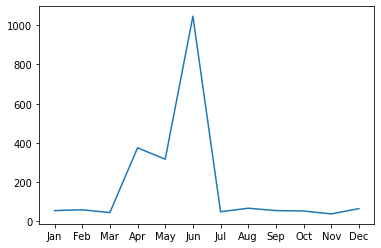

In [88]:
#plot frequency of complaints vs months name
plt.plot(months_data.index, months_data)
plt.savefig("monthly.png")


It can be seen that issues started arising in April and peaked in June, which were then possibly resolved as there were no significant issues for the rest of the year

In [89]:
#get the counts of complaints day-wise and preserve the order of appearance
daily_data =  comcast_sorted['Day of Complaint'].value_counts()[comcast_sorted['Day of Complaint'].unique()]

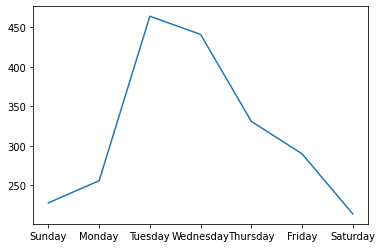

In [90]:
#plot frequency of complaints vs day
plt.plot(daily_data.index,daily_data)
plt.savefig("daily.png")

The above graph indicates that maximum number of issues arose in the middle of the week, usually Tuesday and Wednesday where usually the workload is at its peak. 

In [91]:
comcast.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,complaints_categories,Month of Complaint,Day of Complaint
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,internet,Apr,Wednesday
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,billing,Aug,Tuesday
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,internet,Apr,Saturday
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,internet,Jul,Sunday
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,services,May,Tuesday


In [92]:
#define a method to modify status of complaint
def modify_status(status):
    if(status.lower()=="closed" or status.lower()=="solved"):
        return "Closed"
    else:
        return "Open"

In [93]:
#apply the method to the dataframe
comcast['Status'] = comcast['Status'].apply(modify_status)

In [94]:
#get dummy variables for status and concatenate them to the dataframe
comcast = pd.concat([comcast,pd.get_dummies(comcast['Status'])], axis = 1)

In [95]:
#drop the column status and change the formatting of state to camel case
comcast = comcast.drop(columns = ['Status'])
comcast['State'] = comcast['State'].str.title()

In [96]:
comcast.dtypes

Ticket #                               object
Customer Complaint                     object
Date                                   object
Date_month_year                datetime64[ns]
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Filing on Behalf of Someone            object
complaints_categories                  object
Month of Complaint                     object
Day of Complaint                       object
Closed                                  uint8
Open                                    uint8
dtype: object

In [97]:
#change dtypes of closed and open from uint8 to int64
comcast.Closed = comcast.Closed.astype(int)
comcast.Open = comcast.Open.astype(int)

In [98]:
comcast.dtypes

Ticket #                               object
Customer Complaint                     object
Date                                   object
Date_month_year                datetime64[ns]
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Filing on Behalf of Someone            object
complaints_categories                  object
Month of Complaint                     object
Day of Complaint                       object
Closed                                  int64
Open                                    int64
dtype: object

In [99]:
#create a new dataframe grouped by state consisting of complaints open or closed
complaints_by_state = comcast.groupby(['State']).sum().drop(columns=['Zip code'])
complaints_by_state.head()

,Closed,Open
State,,
Alabama,17,9
Arizona,14,6
Arkansas,6,0
California,159,61
Colorado,58,22


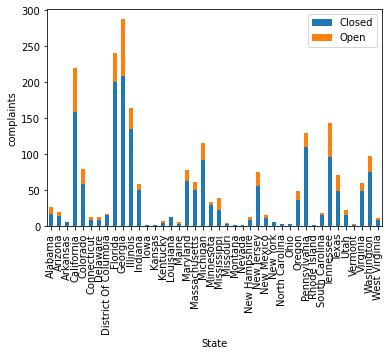

In [100]:
#stacked bar chart for open and closed complaints statewise
ax = complaints_by_state.plot.bar(stacked = True).set_ylabel("complaints")
fig = ax.get_figure()
fig.savefig("stacked.png")

In [101]:
#create a new column which is sum of open and closed
complaints_by_state['total_complaints'] = complaints_by_state.Open + complaints_by_state.Closed

In [102]:
#create a new column which displays the percentage of unresolved complaints statewise
complaints_by_state['percentage_unresolved'] = ((complaints_by_state.Open)*100/(complaints_by_state.Open + complaints_by_state.Closed))
complaints_by_state

,Closed,Open,total_complaints,percentage_unresolved
State,,,,
Alabama,17,9,26,34.615385
Arizona,14,6,20,30.000000
Arkansas,6,0,6,0.000000
California,159,61,220,27.727273
Colorado,58,22,80,27.500000
Connecticut,9,3,12,25.000000
Delaware,8,4,12,33.333333
District Of Columbia,15,2,17,11.764706
Florida,201,39,240,16.250000


In [103]:
#state having highest percentage of unresolved complaints
complaints_by_state[['percentage_unresolved']].idxmax()

percentage_unresolved    Kansas
dtype: object

In [104]:
#state having highest number of total complaints
complaints_by_state[['total_complaints']].idxmax()

total_complaints    Georgia
dtype: object

In [105]:
comcast.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Filing on Behalf of Someone,complaints_categories,Month of Complaint,Day of Complaint,Closed,Open
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,No,internet,Apr,Wednesday,1,0
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,No,billing,Aug,Tuesday,1,0
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Yes,internet,Apr,Saturday,1,0
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Yes,internet,Jul,Sunday,0,1
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,No,services,May,Tuesday,1,0


In [106]:
comcast['Received Via'].value_counts()

Customer Care Call    1119
Internet              1105
Name: Received Via, dtype: int64

In [107]:
#create new dataframe grouped by received via
resolved = comcast.groupby(['Received Via']).sum().drop(columns=['Zip code'])
resolved

,Closed,Open
Received Via,,
Customer Care Call,864,255
Internet,843,262


In [108]:
resolved.dtypes

Closed    int64
Open      int64
dtype: object

In [109]:
#create new column for percentage of resolved complaints corresponding to each category
resolved['percentages_resolved'] = ((resolved.Closed)*100/(resolved.Open+resolved.Closed))
resolved

,Closed,Open,percentages_resolved
Received Via,,,
Customer Care Call,864,255,77.211796
Internet,843,262,76.289593
